In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-08-26 04:01:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  24.2MB/s    in 12s     

2020-08-26 04:01:26 (26.1 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#membuat folder baru untuk pembagian data
os.mkdir('/content/rockpaperscissors/train')
os.mkdir('/content/rockpaperscissors/val')

In [ ]:
import shutil

#pembagian data set
shutil.move('/content/rockpaperscissors/paper', '/content/rockpaperscissors/val')
shutil.move('/content/rockpaperscissors/rock', '/content/rockpaperscissors/val')
shutil.move('/content/rockpaperscissors/scissors', '/content/rockpaperscissors/val')

shutil.move('/content/rockpaperscissors/rps-cv-images/paper', '/content/rockpaperscissors/train')
shutil.move('/content/rockpaperscissors/rps-cv-images/rock', '/content/rockpaperscissors/train')
shutil.move('/content/rockpaperscissors/rps-cv-images/scissors', '/content/rockpaperscissors/train')

'/content/rockpaperscissors/train/scissors'

In [ ]:
#penamaan variabel tiap data
base_dir = '/content/rockpaperscissors'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#cek data dir
os.listdir('/content/rockpaperscissors/train')

['paper', 'rock', 'scissors']

In [ ]:
# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori rock pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori paper pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori rock pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori scissors pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        class_mode='categorical')

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/25
5/5 [==============================] - 13s 3s/step - loss: 2.9567 - accuracy: 0.4000 - val_loss: 1.4802 - val_accuracy: 0.3125
Epoch 2/25
5/5 [==============================] - 12s 2s/step - loss: 1.1517 - accuracy: 0.3250 - val_loss: 1.0896 - val_accuracy: 0.3375
Epoch 3/25
5/5 [==============================] - 12s 2s/step - loss: 1.0852 - accuracy: 0.3750 - val_loss: 1.0817 - val_accuracy: 0.3375
Epoch 4/25
5/5 [==============================] - 12s 2s/step - loss: 1.0942 - accuracy: 0.4250 - val_loss: 1.0551 - val_accuracy: 0.3750
Epoch 5/25
5/5 [==============================] - 12s 2s/step - loss: 1.0033 - accuracy: 0.4688 - val_loss: 1.1821 - val_accuracy: 0.5312
Epoch 6/25
5/5 [==============================] - 12s 2s/step - loss: 1.0663 - accuracy: 0.5857 - val_loss: 1.1133 - val_accuracy: 0.3187
Epoch 7/25
5/5 [==============================] - 12s 2s/step - loss: 0.9909 - accuracy: 0.4500 - val_loss: 0.8261 - val_accuracy: 0.7000
Epoch 8/25
5/5 [==================

Saving 0b5f82ef-6900-4c36-bdac-c446806dc92c.png to 0b5f82ef-6900-4c36-bdac-c446806dc92c.png
[[0. 1. 0.]]
rock


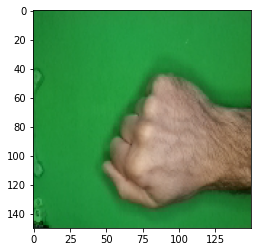

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  if classes[0][0] != 0:
     print("paper")
  elif classes[0][1] != 0:
     print("rock")
  elif classes[0][2] != 0:
    print("scissors")